In [1]:
#installing the kaggle library

!pip install kaggle

In [2]:
# configuring path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dataset from kaggle

In [3]:
#kaggle api

!kaggle competitions download -c dogs-vs-cats

 99% 800M/812M [00:06<00:00, 135MB/s]
100% 812M/812M [00:06<00:00, 140MB/s]


In [4]:
#extracting the compressed files dataset

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('extracted')

extracted


In [5]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('extracted')

extracted


In [6]:
import os
#counting the number of files in rain folder

path, dirs, files = next(os.walk('/content/train'))
file_count  = len(files)

print('Number of images: ', file_count)


Number of images:  25000


In [7]:
file_names = os.listdir('/content/train')
print (file_names)

['dog.10806.jpg', 'cat.9073.jpg', 'cat.5276.jpg', 'dog.12235.jpg', 'cat.851.jpg', 'dog.2447.jpg', 'cat.9483.jpg', 'cat.1307.jpg', 'cat.5064.jpg', 'dog.11406.jpg', 'dog.6992.jpg', 'cat.7292.jpg', 'dog.1593.jpg', 'cat.2415.jpg', 'dog.6796.jpg', 'dog.11319.jpg', 'cat.8104.jpg', 'dog.6334.jpg', 'dog.10318.jpg', 'cat.30.jpg', 'dog.3818.jpg', 'dog.1653.jpg', 'dog.9425.jpg', 'dog.1269.jpg', 'dog.5508.jpg', 'cat.11285.jpg', 'dog.7963.jpg', 'cat.5021.jpg', 'cat.12246.jpg', 'cat.4012.jpg', 'dog.2751.jpg', 'dog.7772.jpg', 'cat.10796.jpg', 'cat.5655.jpg', 'cat.5701.jpg', 'cat.800.jpg', 'dog.1356.jpg', 'dog.10632.jpg', 'cat.2678.jpg', 'cat.1857.jpg', 'dog.6069.jpg', 'dog.1294.jpg', 'dog.6474.jpg', 'cat.1173.jpg', 'dog.604.jpg', 'cat.10400.jpg', 'cat.12183.jpg', 'dog.805.jpg', 'dog.4271.jpg', 'cat.6127.jpg', 'cat.4013.jpg', 'cat.9300.jpg', 'dog.102.jpg', 'cat.8726.jpg', 'cat.10783.jpg', 'cat.10816.jpg', 'cat.3838.jpg', 'cat.6863.jpg', 'dog.4323.jpg', 'cat.9142.jpg', 'dog.11324.jpg', 'dog.10875.jpg',

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


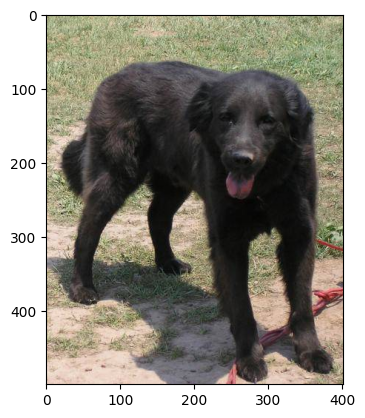

In [10]:
#disp dog image

img = mpimg.imread('/content/train/dog.2447.jpg')
imgplt = plt.imshow(img)

plt.show()

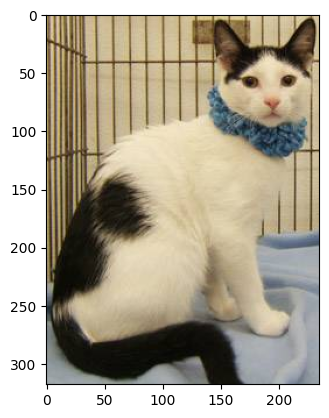

In [12]:
#disp cat image

img = mpimg.imread('/content/train/cat.11285.jpg')
imgplt = plt.imshow(img)

plt.show()

In [14]:
file_names = os.listdir('/content/train')

for i in range (10):

  name = file_names[i]
  print(name[0:3])


dog
cat
cat
dog
cat
dog
cat
cat
cat
dog


In [15]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('number of dog images = ', dog_count)

print('number of cat images = ', cat_count)

number of dog images =  12500
number of cat images =  12500


Resizing all the images

In [16]:
#creating a directory for resized images

os.mkdir('/content/image_resized')

In [20]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'



for i in range(2000):
  filename = os.listdir(original_folder)[i]

  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))

  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

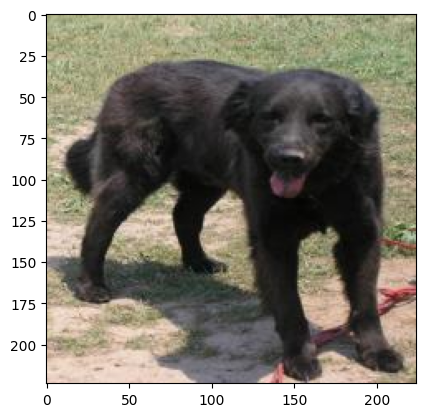

In [21]:
#disp resized dog image

img = mpimg.imread('/content/image_resized/dog.2447.jpg')
imgplt = plt.imshow(img)

plt.show()

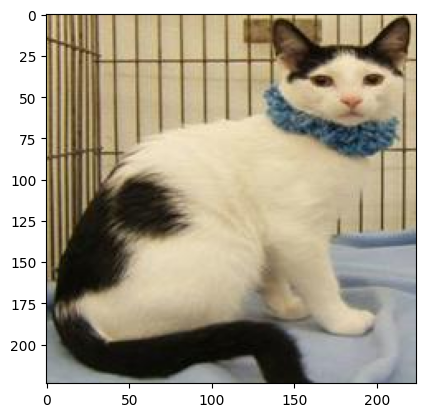

In [22]:
#disp resized cat image

img = mpimg.imread('/content/image_resized/cat.11285.jpg')
imgplt = plt.imshow(img)

plt.show()

In [23]:
#creating labels for the resized images

In [24]:
# cat --> 0
# dog --> 1

In [25]:
#for loop to assign labels for these images

filenames = os.listdir('/content/image_resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]

  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [26]:
print(filenames[0:5])

['dog.10806.jpg', 'cat.9073.jpg', 'cat.5276.jpg', 'dog.12235.jpg', 'cat.851.jpg']


In [27]:
print(len(filenames))

2000


In [28]:
print(labels[0:5])

[1, 0, 0, 1, 0]


In [29]:
# counting the images of dogs ad cats out of the 2000 images

values, counts = np.unique(labels, return_counts = True)

print(values)

print(counts)

[0 1]
[1017  983]


Converting all the resized images to numpy arrays

In [30]:
import cv2
import glob

In [31]:
image_directory = '/content/image_resized/'

image_extension = ['png', 'jpg']


files = []

[files.extend(glob.glob(image_directory + '*.' + e))for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [32]:
print(dog_cat_images)

[[[[ 47  59 101]
   [ 47  59 101]
   [ 49  61 103]
   ...
   [105 143 208]
   [ 92 132 197]
   [ 82 122 187]]

  [[ 54  66 108]
   [ 54  66 108]
   [ 55  67 109]
   ...
   [100 140 205]
   [ 91 131 196]
   [ 80 122 187]]

  [[ 55  67 109]
   [ 54  66 108]
   [ 54  65 109]
   ...
   [ 98 141 204]
   [ 94 137 200]
   [ 90 134 197]]

  ...

  [[ 88 107 145]
   [ 88 107 145]
   [ 84 102 143]
   ...
   [104 117 161]
   [102 115 159]
   [101 114 158]]

  [[ 76  95 133]
   [ 73  92 130]
   [ 74  93 131]
   ...
   [100 113 157]
   [100 113 157]
   [100 113 157]]

  [[ 64  83 121]
   [ 60  79 117]
   [ 65  84 122]
   ...
   [100 113 157]
   [101 114 158]
   [102 115 159]]]


 [[[172 104  59]
   [153  85  40]
   [128  55  11]
   ...
   [188 114  56]
   [189 113  60]
   [188 114  60]]

  [[181 110  66]
   [169  99  52]
   [152  79  35]
   ...
   [193 116  59]
   [190 114  61]
   [188 114  60]]

  [[189 117  70]
   [187 115  67]
   [182 107  61]
   ...
   [199 120  63]
   [194 116  63]
   [189 113

In [33]:
type(dog_cat_images)

numpy.ndarray

In [34]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [35]:
X = dog_cat_images
Y = np.asarray(labels)

Train Tes Slit

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2 )


In [39]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test imaghes

In [40]:
#scaling the data

In [41]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [42]:
print(X_train_scaled)

[[[[0.56862745 0.56470588 0.54901961]
   [0.57254902 0.56862745 0.55294118]
   [0.58039216 0.57647059 0.56078431]
   ...
   [0.56862745 0.57647059 0.58039216]
   [0.5254902  0.52156863 0.5372549 ]
   [0.51764706 0.51372549 0.52941176]]

  [[0.56470588 0.56078431 0.54509804]
   [0.56862745 0.56470588 0.54901961]
   [0.57647059 0.57254902 0.55686275]
   ...
   [0.56078431 0.56862745 0.57254902]
   [0.54509804 0.54117647 0.55686275]
   [0.50196078 0.49803922 0.51372549]]

  [[0.55686275 0.55294118 0.5372549 ]
   [0.56078431 0.55686275 0.54117647]
   [0.56862745 0.56470588 0.54901961]
   ...
   [0.54509804 0.55294118 0.55686275]
   [0.56470588 0.56078431 0.57647059]
   [0.47843137 0.4745098  0.49019608]]

  ...

  [[0.45098039 0.54509804 0.54509804]
   [0.42745098 0.51764706 0.5254902 ]
   [0.38431373 0.48235294 0.49803922]
   ...
   [0.5372549  0.54901961 0.54117647]
   [0.54117647 0.55294118 0.54509804]
   [0.54117647 0.55294118 0.54509804]]

  [[0.43137255 0.5254902  0.5254902 ]
   [0.4

**Building a neural network**

In [43]:
import tensorflow as tf

import tensorflow_hub as hub

In [44]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable = False )


In [45]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [46]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']


)

In [47]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 75s 1s/step - loss: 0.1751 - acc: 0.9381
Epoch 2/5
50/50 [==============================] - 64s 1s/step - loss: 0.0631 - acc: 0.9844
Epoch 3/5
50/50 [==============================] - 58s 1s/step - loss: 0.0487 - acc: 0.9881
Epoch 4/5
50/50 [==============================] - 57s 1s/step - loss: 0.0402 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 57s 1s/step - loss: 0.0341 - acc: 0.9931


In [48]:
score, acc = model.evaluate(X_test_scaled, Y_test)

print('Test loss = ', score)
print('test accuracy = ', acc)

13/13 [==============================] - 14s 958ms/step - loss: 0.0999 - acc: 0.9575
Test loss =  0.09989383816719055
test accuracy =  0.9574999809265137


predictive system

path of the image to be predicted: /content/download (1).jpeg


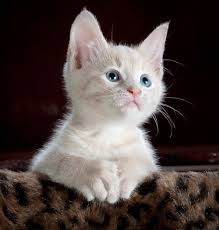

1/1 [==============================] - 0s 47ms/step
image represents a cat


In [52]:
input_image_path = input('path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/225

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('image represents a cat')

else:
  print('image of a dog')
